# CRM case

## Table of Contents

[1. Basic information](#1.-Basic-infos)

[2. Libraries](#2.-Libraries)

[3. Data](#3.-Data)

* [3.1 Data preparation](#3.1-Data-preparation)

[4. Distributions](#4.-Distributions)

* [4.1 Outliers](#4.1-Outliers)

[5. Basic statistics](#5.-Basic-statistics)

[6. Visualizations](#6.-Visualizations)

[7. RFM model](#7.-RFM-model)

* [7.1 Clusters](#7.1-Clusters)

## 1. Basic infos
[Return to Table of Contents](#Table-of-Contents)

**Source:** https://github.com/ifood/ifood-data-business-analyst-test


**The Company:** Consider a well-established company operating in the retail food sector. Presently they have around
several hundred thousand registered customers and serve almost one million consumers a year.
They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially
prepared fish and sweet products. These can further be divided into gold and regular products. The
customers can order and acquire products through 3 sales channels: physical stores, catalogs and
company’s website. Globally, the company had solid revenues and a healthy bottom line in the past
3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason,
several strategic initiatives are being considered to invert this situation. One is to improve the
performance of marketing activities, with a special focus on marketing campaigns.


**The marketing department:** The marketing department was pressured to spend its annual budget more wisely. The CMO
perceives the importance of having a more quantitative approach when taking decisions, reason why
a small team of data scientists was hired with a clear objective in mind: to build a predictive model
which will support direct marketing initiatives. Desirably, the success of these activities will prove the
value of the approach and convince the more skeptical within the company.


**The objective:** The objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at
selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240
customers was carried out. The customers were selected at random and contacted by phone
regarding the acquisition of the gadget. During the following months, customers who bought the
offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue
generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a
profit of -3.046MU. The success rate of the campaign was 15%. The objective is of the team is to
develop a model that predicts customer behavior and to apply it to the rest of the customer base.
Hopefully, the model will allow the company to cherry pick the customers that are most likely to
purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.


**The data:** The data set contains socio-demographic and firmographic features about 2.240 customers who
were contacted. Additionally, it contains a flag for those customers who responded the campaign,
by buying the product


**Description of each column:**

| Variables | Description | Data type |  
|:---|:---|:---|
| AcceptedCmp1 | 1 if costumer accepted the offer in the 1<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp2 | 1 if costumer accepted the offer in the 2<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp3 | 1 if costumer accepted the offer in the 3<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp4 | 1 if costumer accepted the offer in the 4<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp5 | 1 if costumer accepted the offer in the 5<sup>st</sup> campaign, 0 otherwise | Discrete |
| Response (target) | 1 if costumer accepted the offer in the last campaign, 0 otherwise | Discrete |
| Complain | 1 if costumer complained in the last 2 years | Discrete |
| DtCustomer | date of customer's enrollment with the company | Ordinal |
| Education | customer's level of education | Ordinal |
| Marital | customer's marital status | Nominal |
| Kidhome | number of small children in customer's household | Discrete |
| Teenhome | number of teenagers in customer's household | Discrete |
| Income | customer's yearly household income | Continuous |
| MntFishProducts | amount spent on fish products in the last 2 years | Discrete |
| MntMeatProducts | amount meat on fish products in the last 2 years | Discrete |
| MntFruits | amount spent on fruits in the last 2 years | Discrete |
| MntSweetProducts | amount spent on sweet products in the last 2 years | Discrete |
| MntWines | amount spent on wine in the last 2 years | Discrete |
| MntGoldProducts | amount spent on *gold* products in the last 2 years | Discrete |
| NumDealsPurchases | number of purchases made with discount | Discrete |
| NumCatalogPurchases | number of purchases made using catalog | Discrete |
| NumStorePurchases | number of purchases made directly in stores | Discrete |
| NumWebPurchases | number of purchases made through company's web site | Discrete |
| NumWebVisitsMonth | number of visits to company's web site in the las month | Discrete |
| Recency | number of days since the last purchase | Discrete |
| Year_Birth | year of birth | Discrete |
| Z_CostContact | cost contact | Discrete |
| Z_Revenue | revenue | Discrete |
| ID | client identification | Discrete |


## 2. Libraries
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd # dataframe
import numpy as np # list
import datetime # date & time
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot
from scipy.stats import normaltest # normal distribution
from statsmodels.stats.weightstats import zconfint # z test
from statsmodels.stats.weightstats import DescrStatsW # t test
import plotly.graph_objects as go # table tests
from scipy.stats import ranksums # test between sample means
from scipy import stats # zscore

## 3. Data
[Return to Table of Contents](#Table-of-Contents)

In [2]:
# upload
data = pd.read_csv("data/ml_project1_data.csv")

In [3]:
# display all columns
pd.set_option('max_columns', None)

In [4]:
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
66,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,3,11,0
1316,4554,1965,Graduation,Together,47009.0,0,1,2013-10-01,89,171,45,73,59,10,90,4,3,2,8,4,0,0,0,0,0,0,3,11,0
537,6931,1967,Graduation,Divorced,76982.0,0,0,2014-02-15,19,464,151,292,65,60,30,1,8,3,4,4,0,0,1,0,0,0,3,11,1
1584,4608,1987,Graduation,Divorced,81361.0,0,0,2014-02-25,18,163,23,424,27,65,76,1,3,10,13,1,0,0,0,0,0,0,3,11,1
1926,10872,1969,PhD,Married,55212.0,0,1,2012-11-23,65,1103,0,45,0,0,34,3,4,2,11,8,0,1,0,0,1,0,3,11,0


In [5]:
print('The data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The data has 2240 rows and 29 columns.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Income,24,0.010714
Response,0,0.000000
MntSweetProducts,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


* There are null values only in variable 'Income'.

In [8]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
data['Kidhome'].unique()

array([0, 1, 2])

In [11]:
data['Teenhome'].unique()

array([0, 1, 2])

In [12]:
data['AcceptedCmp1'].unique()

array([0, 1])

In [13]:
data['AcceptedCmp2'].unique()

array([0, 1])

In [14]:
data['AcceptedCmp3'].unique()

array([0, 1])

In [15]:
data['AcceptedCmp4'].unique()

array([0, 1])

In [16]:
data['AcceptedCmp5'].unique()

array([0, 1])

In [17]:
data['Z_CostContact'].unique()

array([3])

In [18]:
data['Z_Revenue'].unique()

array([11])

In [19]:
data['Response'].unique()

array([1, 0])

### 3.1 Data preparation
[Return to Table of Contents](#Table-of-Contents)

In [20]:
# delete 'na' values
data_p = data.dropna()

# verify na values
data_p.isna().values.any()

False

In [21]:
# delete variables with a single value - does not add information
data_p = data_p.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [22]:
print('The new data has {} rows and {} columns.'.format(data_p.shape[0], data_p.shape[1]))

The new data has 2216 rows and 27 columns.


## 4. Distributions
[Return to Table of Contents](#Table-of-Contents)

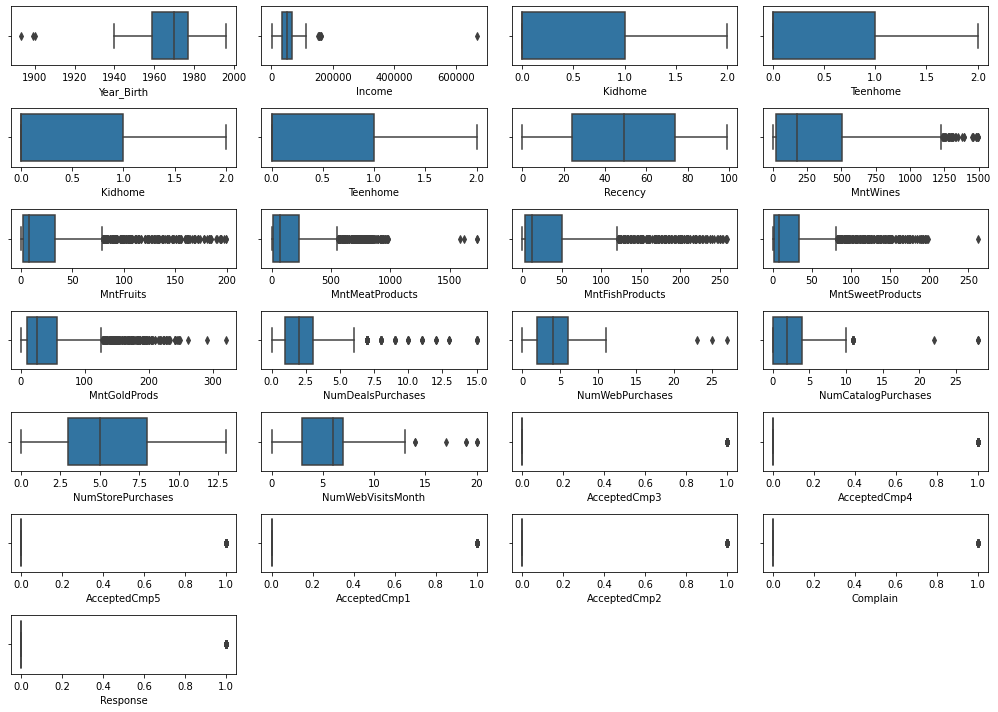

In [23]:
# boxplot to verify outliers

f, axes = plt.subplots(7, 4, figsize=(14, 10))
#sns.despine(left=True)

sns.boxplot(x=data_p['Year_Birth'], ax=axes[0, 0])
sns.boxplot(x=data_p['Income'], ax=axes[0, 1])
sns.boxplot(x=data_p['Kidhome'], ax=axes[0, 2])
sns.boxplot(x=data_p['Teenhome'], ax=axes[0, 3])
sns.boxplot(x=data_p['Kidhome'], ax=axes[1, 0])
sns.boxplot(x=data_p['Teenhome'], ax=axes[1, 1])
sns.boxplot(x=data_p['Recency'], ax=axes[1, 2])
sns.boxplot(x=data_p['MntWines'], ax=axes[1, 3])
sns.boxplot(x=data_p['MntFruits'], ax=axes[2, 0])
sns.boxplot(x=data_p['MntMeatProducts'], ax=axes[2, 1])
sns.boxplot(x=data_p['MntFishProducts'], ax=axes[2, 2])
sns.boxplot(x=data_p['MntSweetProducts'], ax=axes[2, 3])
sns.boxplot(x=data_p['MntGoldProds'], ax=axes[3, 0])
sns.boxplot(x=data_p['NumDealsPurchases'], ax=axes[3, 1])
sns.boxplot(x=data_p['NumWebPurchases'], ax=axes[3, 2])
sns.boxplot(x=data_p['NumCatalogPurchases'], ax=axes[3, 3])
sns.boxplot(x=data_p['NumStorePurchases'], ax=axes[4, 0])
sns.boxplot(x=data_p['NumWebVisitsMonth'], ax=axes[4, 1])
sns.boxplot(x=data_p['AcceptedCmp3'], ax=axes[4, 2])
sns.boxplot(x=data_p['AcceptedCmp4'], ax=axes[4, 3])
sns.boxplot(x=data_p['AcceptedCmp5'], ax=axes[5, 0])
sns.boxplot(x=data_p['AcceptedCmp1'], ax=axes[5, 1])
sns.boxplot(x=data_p['AcceptedCmp2'], ax=axes[5, 2])
sns.boxplot(x=data_p['Complain'], ax=axes[5, 3])
sns.boxplot(x=data_p['Response'], ax=axes[6, 0])

f.delaxes(ax=axes[6, 1])
f.delaxes(ax=axes[6, 2])
f.delaxes(ax=axes[6, 3])

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
plt.tight_layout()

### 4.1 Outliers
[Return to Table of Contents](#Table-of-Contents)

* Year_Birth

In [24]:
outliers = data_p.query('Year_Birth < 1940')
outliers[['Year_Birth']]

,Year_Birth
192,1900
239,1893
339,1899


In [25]:
# find outliers above upper limit
def up_outliers(df, col):
    q1_support = df[col].quantile(.25)
    q3_support = df[col].quantile(.75)

    # Interquartile range
    iqr_support = q3_support - q1_support

    # Up limit
    upper = q3_support + 1.5 * iqr_support
    return upper

* Income

In [26]:
up_outliers(data_p, 'Income')

118350.5

In [27]:
outliers = data.query('Income > 118350.5')
outliers[['Income']].tail()

,Income
687,160803.0
1300,157733.0
1653,157146.0
2132,156924.0
2233,666666.0


* MntWines

In [28]:
up_outliers(data_p, 'MntWines')

1226.5

In [29]:
outliers = data.query('MntWines > 1226.5')
outliers[['MntWines']].tail()

,MntWines
1961,1462
1992,1276
2067,1245
2098,1486
2127,1311


* MntFruits

In [30]:
up_outliers(data_p, 'MntFruits')

79.5

In [31]:
outliers = data.query('MntFruits > 79.5')
outliers[['MntFruits']].tail()

,MntFruits
2185,142
2194,80
2203,124
2206,129
2217,194


* MntMeatProducts

In [32]:
up_outliers(data_p, 'MntMeatProducts')

556.625

In [33]:
outliers = data.query('MntMeatProducts > 556.625')
outliers[['MntMeatProducts']].tail()

,MntMeatProducts
2190,655
2193,845
2211,860
2213,631
2228,1607


* MntFishProducts

In [34]:
up_outliers(data_p, 'MntFishProducts')

120.5

In [35]:
outliers = data.query('MntFishProducts > 120.5')
outliers[['MntFishProducts']].tail()

,MntFishProducts
2188,199
2190,145
2193,202
2206,182
2217,149


* MntSweetProducts 

In [36]:
up_outliers(data_p, 'MntSweetProducts')

81.0

In [37]:
outliers = data.query('MntSweetProducts > 81.0')
outliers[['MntSweetProducts']].tail()

,MntSweetProducts
2175,92
2190,111
2193,133
2217,125
2235,118


* MntGoldProds

In [38]:
up_outliers(data_p, 'MntGoldProds')

126.5

In [39]:
outliers = data.query('MntGoldProds > 126.5')
outliers[['MntGoldProds']].tail()

,MntGoldProds
2178,227
2188,163
2194,174
2198,152
2235,247


* NumDealsPurchases

In [40]:
up_outliers(data_p, 'NumDealsPurchases')

6.0

In [41]:
outliers = data.query('NumDealsPurchases > 6.0')
outliers[['NumDealsPurchases']].tail()

,NumDealsPurchases
2090,7
2144,7
2198,7
2226,8
2236,7


* NumWebPurchases

In [42]:
up_outliers(data_p, 'NumWebPurchases')

12.0

In [43]:
outliers = data.query('NumWebPurchases > 12.0')
outliers[['NumWebPurchases']].tail()

,NumWebPurchases
27,27
1806,23
1898,27
1975,25


* NumCatalogPurchases

In [44]:
up_outliers(data_p, 'NumCatalogPurchases')

10.0

In [45]:
outliers = data.query('NumCatalogPurchases > 10.0')
outliers[['NumCatalogPurchases']].tail()

,NumCatalogPurchases
1745,11
1828,11
1906,11
1940,11
1958,11


* NumWebVisitsMonth

In [46]:
up_outliers(data_p, 'NumWebVisitsMonth')

13.0

In [47]:
outliers = data.query('NumWebVisitsMonth > 13.0')
outliers[['NumWebVisitsMonth']].tail()

,NumWebVisitsMonth
1042,19
1245,20
1328,17
1524,14
1846,19


In [48]:
# calculate z-score
cols = data_p.select_dtypes(include=np.number).columns.tolist()
cols = [x for x in cols if x not in ['ID','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']]
#cols.remove('ID','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response')
#data_p_new[cols]
data_p_new = pd.DataFrame(data=data_p[cols])

# iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    data_p_new[col_zscore] = (data_p_new[col] - data_p_new[col].mean())/data_p_new[col].std()
    
data_p_new.sample(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year_Birth_zscore,Income_zscore,Kidhome_zscore,Teenhome_zscore,Recency_zscore,MntWines_zscore,MntFruits_zscore,MntMeatProducts_zscore,MntFishProducts_zscore,MntSweetProducts_zscore,MntGoldProds_zscore,NumDealsPurchases_zscore,NumWebPurchases_zscore,NumCatalogPurchases_zscore,NumStorePurchases_zscore,NumWebVisitsMonth_zscore
651,1985,29103.0,1,0,38,16,0,17,6,3,6,2,1,0,3,9,1.349925,-0.919405,1.039704,-0.928763,-0.380424,-0.857005,-0.662313,-0.668779,-0.577834,-0.585042,-0.732702,-0.168193,-1.125627,-0.912631,-0.861636,1.517696
806,1971,56850.0,0,1,83,34,1,19,2,7,0,1,1,1,3,2,0.181852,0.182844,-0.822854,0.908861,1.174069,-0.803644,-0.637184,-0.659862,-0.650891,-0.487652,-0.848498,-0.688021,-1.125627,-0.570954,-0.861636,-1.368475
1842,1968,27071.0,1,0,90,8,3,19,0,2,3,2,2,0,3,6,-0.068449,-1.000126,1.039704,-0.928763,1.415879,-0.880720,-0.586925,-0.659862,-0.687419,-0.609390,-0.790600,-0.168193,-0.760790,-0.912631,-0.861636,0.280765
187,1966,61286.0,0,1,34,356,0,107,19,9,117,2,7,1,8,5,-0.235316,0.359064,-0.822854,0.908861,-0.518601,0.150917,-0.662313,-0.267501,-0.340400,-0.438957,1.409518,-0.168193,1.063394,-0.570954,0.676454,-0.131545
127,1953,54348.0,1,1,51,70,0,16,0,0,4,2,2,0,4,6,-1.319955,0.083452,1.039704,0.908861,0.068652,-0.696923,-0.662313,-0.673238,-0.687419,-0.658085,-0.771300,-0.168193,-0.760790,-0.912631,-0.554018,0.280765


In [49]:
# select rows: z-score <= 3.5
data_p = data_p[(np.abs(stats.zscore(data_p_new)) <= 3.5).all(axis=1)].copy()

In [50]:
print('The new data has {} rows and {} columns.'.format(data_p.shape[0], data_p.shape[1]))

The new data has 2079 rows and 27 columns.


In [184]:
obj_cols = data_p.select_dtypes(include=object).copy() #.columns.tolist()

In [185]:
obj_cols

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,2012-09-04
1,Graduation,Single,2014-03-08
2,Graduation,Together,2013-08-21
3,Graduation,Together,2014-02-10
4,PhD,Married,2014-01-19
...,...,...,...
2235,Graduation,Married,2013-06-13
2236,PhD,Together,2014-06-10
2237,Graduation,Divorced,2014-01-25
2238,Master,Together,2014-01-24


In [55]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


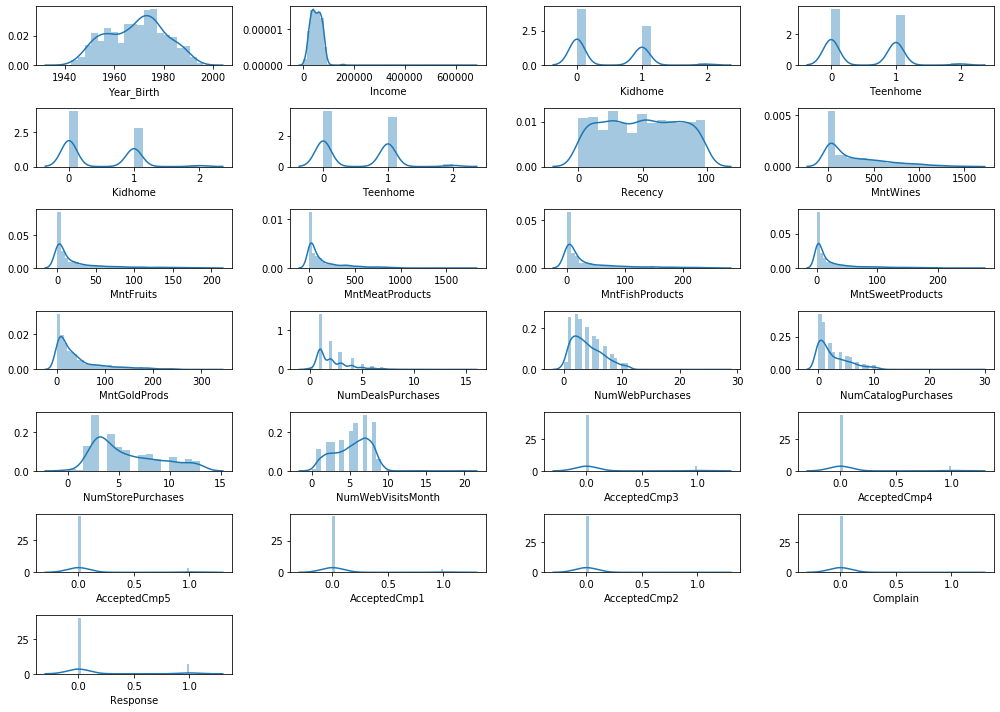

In [27]:
f, axes = plt.subplots(7, 4, figsize=(14, 10))
#sns.despine(left=True)

sns.distplot(data_c['Year_Birth'], ax=axes[0, 0])
sns.distplot(data_c['Income'], ax=axes[0, 1])
sns.distplot(data_c['Kidhome'], ax=axes[0, 2])
sns.distplot(data_c['Teenhome'], ax=axes[0, 3])
sns.distplot(data_c['Kidhome'], ax=axes[1, 0])
sns.distplot(data_c['Teenhome'], ax=axes[1, 1])
sns.distplot(data_c['Recency'], ax=axes[1, 2])
sns.distplot(data_c['MntWines'], ax=axes[1, 3])
sns.distplot(data_c['MntFruits'], ax=axes[2, 0])
sns.distplot(data_c['MntMeatProducts'], ax=axes[2, 1])
sns.distplot(data_c['MntFishProducts'], ax=axes[2, 2])
sns.distplot(data_c['MntSweetProducts'], ax=axes[2, 3])
sns.distplot(data_c['MntGoldProds'], ax=axes[3, 0])
sns.distplot(data_c['NumDealsPurchases'], ax=axes[3, 1])
sns.distplot(data_c['NumWebPurchases'], ax=axes[3, 2])
sns.distplot(data_c['NumCatalogPurchases'], ax=axes[3, 3])
sns.distplot(data_c['NumStorePurchases'], ax=axes[4, 0])
sns.distplot(data_c['NumWebVisitsMonth'], ax=axes[4, 1])
sns.distplot(data_c['AcceptedCmp3'], ax=axes[4, 2], kde_kws = {'bw' : 0.1})
sns.distplot(data_c['AcceptedCmp4'], ax=axes[4, 3], kde_kws = {'bw' : 0.1})
sns.distplot(data_c['AcceptedCmp5'], ax=axes[5, 0], kde_kws = {'bw' : 0.1})
sns.distplot(data_c['AcceptedCmp1'], ax=axes[5, 1], kde_kws = {'bw' : 0.1})
sns.distplot(data_c['AcceptedCmp2'], ax=axes[5, 2], kde_kws = {'bw' : 0.1})
sns.distplot(data_c['Complain'], ax=axes[5, 3], kde_kws = {'bw' : 0.1})
sns.distplot(data_c['Response'], ax=axes[6, 0], kde_kws = {'bw' : 0.1})

f.delaxes(ax=axes[6, 1])
f.delaxes(ax=axes[6, 2])
f.delaxes(ax=axes[6, 3])

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
plt.tight_layout()

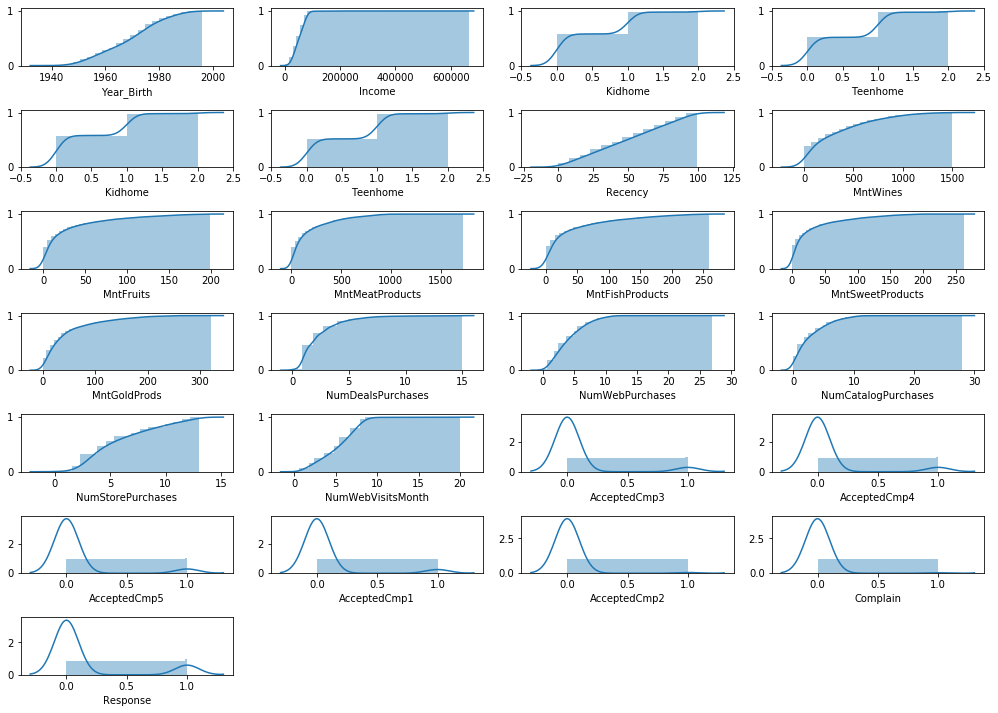

In [28]:
# cumulative proportion

f, axes = plt.subplots(7, 4, figsize=(14, 10))
#sns.despine(left=True)

sns.distplot(data_c['Year_Birth'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[0, 0])
sns.distplot(data_c['Income'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[0, 1])
sns.distplot(data_c['Kidhome'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[0, 2])
sns.distplot(data_c['Teenhome'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[0, 3])
sns.distplot(data_c['Kidhome'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[1, 0])
sns.distplot(data_c['Teenhome'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[1, 1])
sns.distplot(data_c['Recency'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[1, 2])
sns.distplot(data_c['MntWines'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[1, 3])
sns.distplot(data_c['MntFruits'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[2, 0])
sns.distplot(data_c['MntMeatProducts'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[2, 1])
sns.distplot(data_c['MntFishProducts'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[2, 2])
sns.distplot(data_c['MntSweetProducts'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[2, 3])
sns.distplot(data_c['MntGoldProds'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[3, 0])
sns.distplot(data_c['NumDealsPurchases'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[3, 1])
sns.distplot(data_c['NumWebPurchases'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[3, 2])
sns.distplot(data_c['NumCatalogPurchases'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[3, 3])
sns.distplot(data_c['NumStorePurchases'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[4, 0])
sns.distplot(data_c['NumWebVisitsMonth'], hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True},ax=axes[4, 1])
sns.distplot(data_c['AcceptedCmp3'], hist_kws = {'cumulative': True}, kde_kws = {'bw' : 0.1},ax=axes[4, 2])
sns.distplot(data_c['AcceptedCmp4'], hist_kws = {'cumulative': True}, kde_kws = {'bw' : 0.1},ax=axes[4, 3])
sns.distplot(data_c['AcceptedCmp5'], hist_kws = {'cumulative': True}, kde_kws = {'bw' : 0.1},ax=axes[5, 0])
sns.distplot(data_c['AcceptedCmp1'], hist_kws = {'cumulative': True}, kde_kws = {'bw' : 0.1},ax=axes[5, 1])
sns.distplot(data_c['AcceptedCmp2'], hist_kws = {'cumulative': True}, kde_kws = {'bw' : 0.1},ax=axes[5, 2])
sns.distplot(data_c['Complain'], hist_kws = {'cumulative': True}, kde_kws = {'bw' : 0.1},ax=axes[5, 3])
sns.distplot(data_c['Response'], hist_kws = {'cumulative': True}, kde_kws = {'bw' : 0.1},ax=axes[6, 0])

f.delaxes(ax=axes[6, 1])
f.delaxes(ax=axes[6, 2])
f.delaxes(ax=axes[6, 3])

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
plt.tight_layout()


In [ ]:
# dummy
# data_p = pd.get_dummies(data_p) 

## 5. Basic statistics
[Return to Table of Contents](#Table-of-Contents)

In [29]:
data_c.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,5586.899232,1968.917307,52236.581563,0.441934,0.505648,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,2.325350,4.087664,2.671487,5.805242,5.321735,0.073656,0.074108,0.072752,0.064166,0.013556,0.009038,0.150474
std,3247.819194,11.700216,25178.603047,0.536965,0.544236,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,1.924402,2.741664,2.927096,3.250752,2.425092,0.261269,0.262005,0.259788,0.245104,0.115666,0.094657,0.357617
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2815.000000,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8420.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
corr = data_c.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.000000,0.005454,0.013840,0.001527,-0.004004,-0.044606,-0.019367,0.009839,-0.004060,-0.022686,-0.004718,-0.008340,-0.040363,-0.017439,-0.000710,-0.012189,-0.008458,-0.035807,-0.023836,-0.004590,-0.018123,-0.014959,0.031778,-0.021330
Year_Birth,0.005454,1.000000,-0.163295,0.237738,-0.362112,-0.015971,-0.164843,-0.013542,-0.033823,-0.041316,-0.021710,-0.059960,-0.065866,-0.162366,-0.126012,-0.139229,0.120355,0.061001,-0.070114,0.018936,-0.012021,-0.007857,-0.004631,0.020803
Income,0.013840,-0.163295,1.000000,-0.428231,0.019285,-0.003111,0.578481,0.430248,0.584361,0.438523,0.440532,0.325073,-0.082874,0.388183,0.589090,0.530120,-0.552736,-0.016063,0.184615,0.335032,0.277071,0.087635,-0.024902,0.133302
Kidhome,0.001527,0.237738,-0.428231,1.000000,-0.039485,0.010196,-0.497407,-0.373305,-0.439192,-0.388777,-0.378014,-0.355095,0.216913,-0.372410,-0.504706,-0.502062,0.447273,0.015999,-0.162201,-0.204660,-0.174339,-0.081946,0.037013,-0.078076
Teenhome,-0.004004,-0.362112,0.019285,-0.039485,1.000000,0.014764,0.004312,-0.175736,-0.260778,-0.204954,-0.162794,-0.018315,0.386298,0.162368,-0.112207,0.049556,0.130839,-0.042669,0.038279,-0.189961,-0.145058,-0.015580,0.007784,-0.154189
Recency,-0.044606,-0.015971,-0.003111,0.010196,0.014764,1.000000,0.016332,-0.005129,0.023177,0.001007,0.025495,0.018394,0.002236,-0.005518,0.024423,-0.000109,-0.019075,-0.032240,0.017631,0.000347,-0.021036,-0.001382,0.005750,-0.199899
MntWines,-0.019367,-0.164843,0.578481,-0.497407,0.004312,0.016332,1.000000,0.385892,0.568189,0.397035,0.389731,0.391604,0.008769,0.553704,0.634306,0.640343,-0.321666,0.061460,0.373389,0.472909,0.351647,0.206319,-0.036376,0.246434
MntFruits,0.009839,-0.013542,0.430248,-0.373305,-0.175736,-0.005129,0.385892,1.000000,0.546767,0.593062,0.571498,0.393503,-0.134287,0.302340,0.485645,0.459909,-0.417764,0.014683,0.006638,0.209021,0.192446,-0.009907,-0.002942,0.123059
MntMeatProducts,-0.004060,-0.033823,0.584361,-0.439192,-0.260778,0.023177,0.568189,0.546767,1.000000,0.573054,0.534713,0.357675,-0.121357,0.306919,0.733832,0.486478,-0.539214,0.018498,0.091751,0.375293,0.313422,0.043580,-0.020986,0.238059
MntFishProducts,-0.022686,-0.041316,0.438523,-0.388777,-0.204954,0.001007,0.397035,0.593062,0.573054,1.000000,0.583548,0.426385,-0.143326,0.299495,0.532306,0.457989,-0.446182,-0.000207,0.016126,0.194845,0.261755,0.002351,-0.019074,0.108227


## 6. Visualizations
[Return to Table of Contents](#Table-of-Contents)

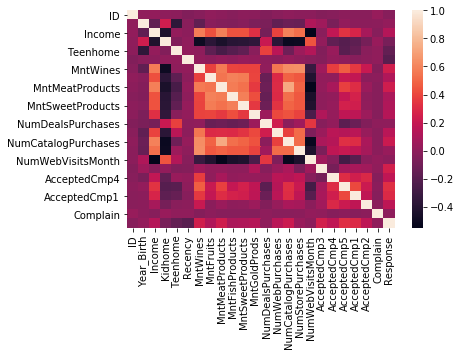

In [31]:
ax = sns.heatmap(corr)

In [32]:
def plot_percentage(var, data):
    plt.figure(figsize=(8, 6))
    
    ax = sns.countplot(x=var, data=data, orient='h')
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(var, fontsize=15)
    sizes = []
    
    for p in ax.patches:
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x() + p.get_width()/1.6, 
                height + 6,
               '{:1.2f}%'.format(height/len(data)*100),
               ha = 'center', va = 'bottom',
               fontsize=12)

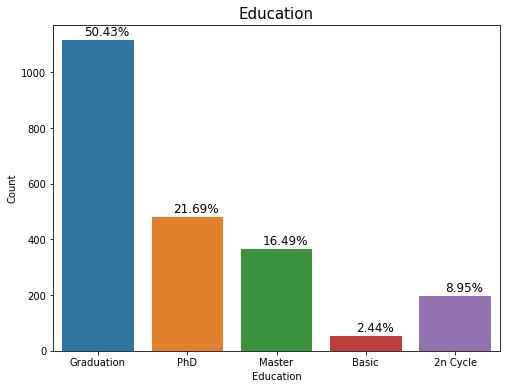

In [33]:
plot_percentage('Education',data_c)

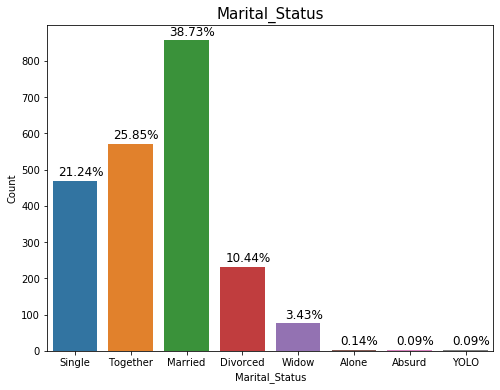

In [34]:
plot_percentage('Marital_Status',data_c)

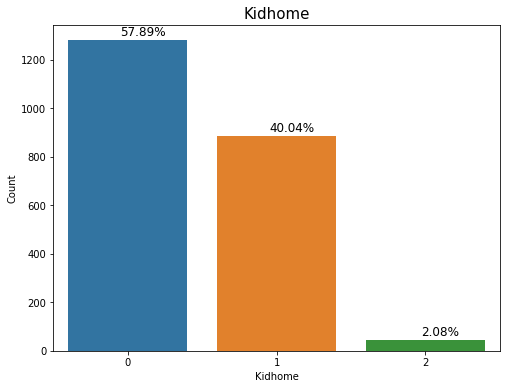

In [35]:
plot_percentage('Kidhome',data_c)

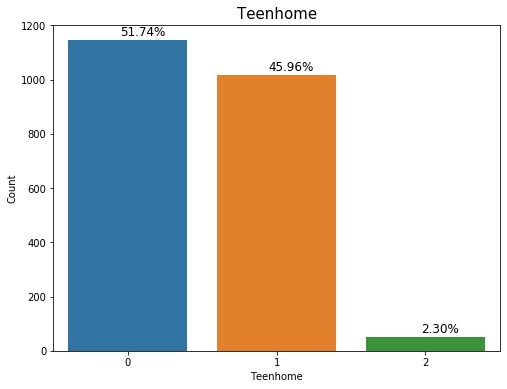

In [36]:
plot_percentage('Teenhome',data_c)

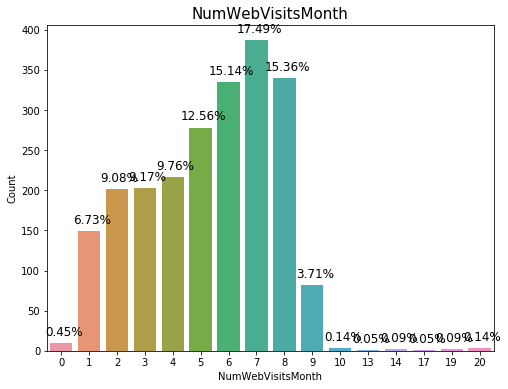

In [37]:
plot_percentage('NumWebVisitsMonth',data_c)

Text(0.5, 0.98, 'Number of purchases made')

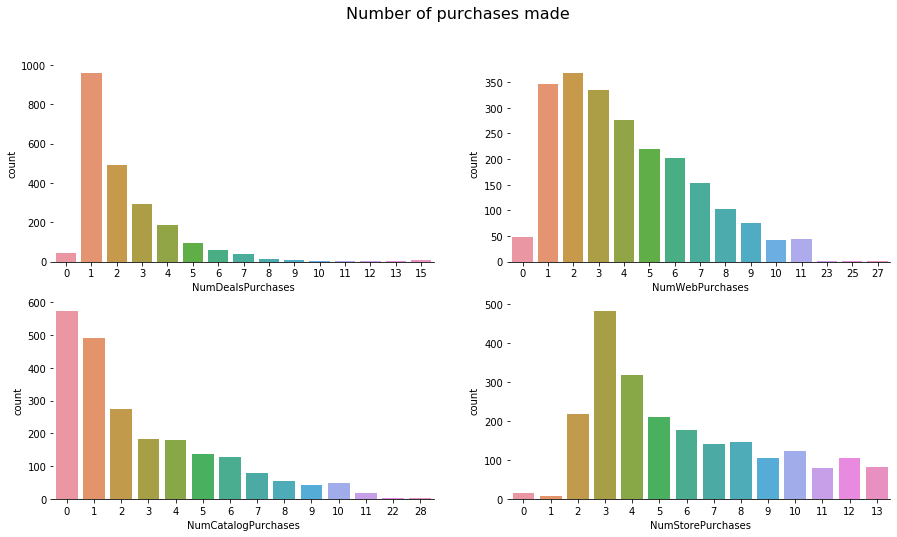

In [38]:
# Num Purchases

f, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.despine(left=True)

sns.countplot(x='NumDealsPurchases', data=data_c, orient='h',ax=axes[0, 0])
sns.countplot(x='NumWebPurchases', data=data_c, orient='h',ax=axes[0, 1])
sns.countplot(x='NumCatalogPurchases', data=data_c, orient='h',ax=axes[1, 0])
sns.countplot(x='NumStorePurchases', data=data_c, orient='h',ax=axes[1, 1])

f.suptitle('Number of purchases made', fontsize=16)

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
#plt.tight_layout()

[]

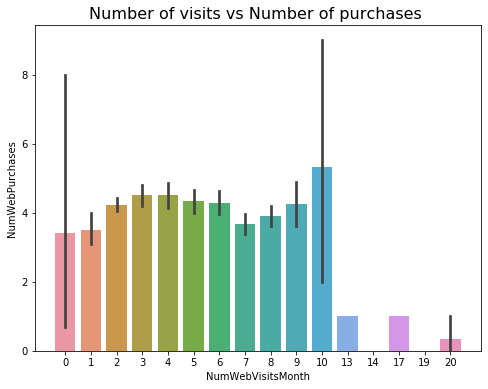

In [39]:
# NumWebVisitsMonth vs NumWebPurchases
plt.figure(figsize=(8,6))
ax = sns.barplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data_c)
ax.set_title('Number of visits vs Number of purchases ', fontsize=16)
ax.plot()

Text(0.5, 0.98, '1 if costumer accepted the offer in the campaign, 0 otherwise')

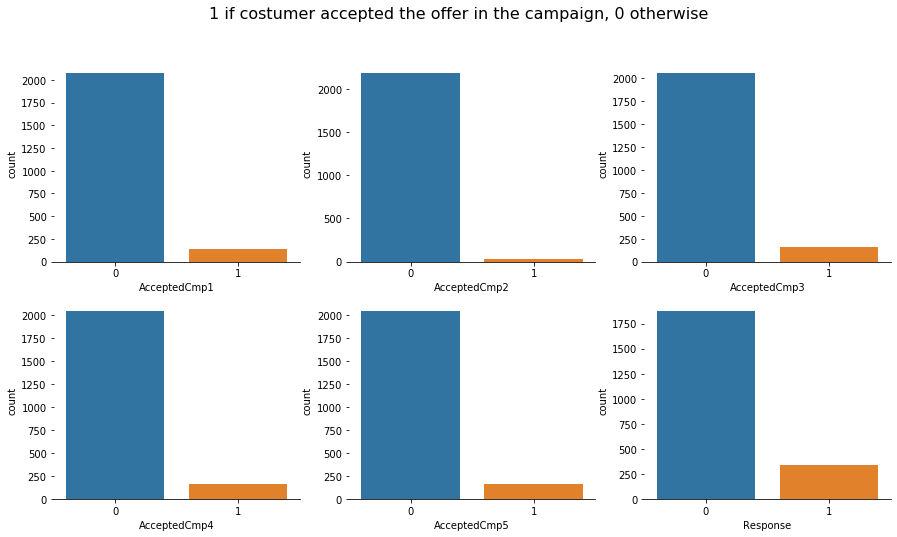

In [40]:
# AcceptedCmp

f, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.despine(left=True)

sns.countplot(x='AcceptedCmp1', data=data_c, orient='h',ax=axes[0, 0])# 1st campaign
sns.countplot(x='AcceptedCmp2', data=data_c, orient='h',ax=axes[0, 1])# 2st campaign
sns.countplot(x='AcceptedCmp3', data=data_c, orient='h',ax=axes[0, 2])# 3st campaign
sns.countplot(x='AcceptedCmp4', data=data_c, orient='h',ax=axes[1, 0])# 4st campaign
sns.countplot(x='AcceptedCmp5', data=data_c, orient='h',ax=axes[1, 1])# 5st campaign
sns.countplot(x='Response', data=data_c, orient='h',ax=axes[1, 2])    # last campaign

f.suptitle('1 if costumer accepted the offer in the campaign, 0 otherwise', fontsize=16)

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
#plt.tight_layout()

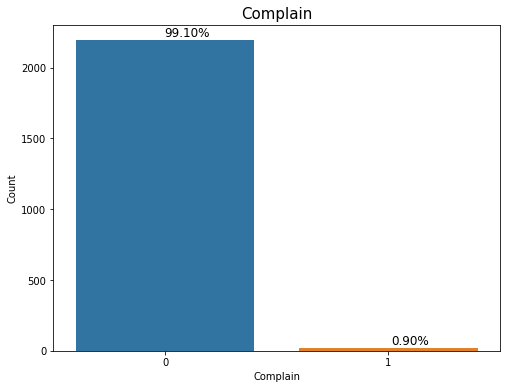

In [41]:
plot_percentage('Complain',data_c)

## 7. RFM model
[Return to Table of Contents](#Table-of-Contents)

**Recency** – How recently did the customer purchase?

**Frequency** – How often do they purchase?

**Monetary value** – How much do they spend?

Source: https://en.wikipedia.org/wiki/RFM_(market_research)

### 7.1 Clusters
[Return to Table of Contents](#Table-of-Contents)

In [42]:
# Within Cluster Sum of Squares (WCSS)
from sklearn.cluster import KMeans

def calculate_wcss(data):
    wcss = []
    for k in range(1, 10): # n clusters tested
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [46]:
# create dataset
df_recency = data_c[['Recency']].copy()
df_recency.head()

,Recency
0,58
1,38
2,26
3,26
4,94


In [48]:
# Inertia
sum_squares = calculate_wcss(df_recency)
sum_squares

[1852840.8694080433,
 467837.99059255753,
 203432.32396404175,
 117741.41457626974,
 72546.56215553886,
 52277.668109374135,
 40091.95576389348,
 31100.09251059387,
 24093.535151165685]

**Elbow method**

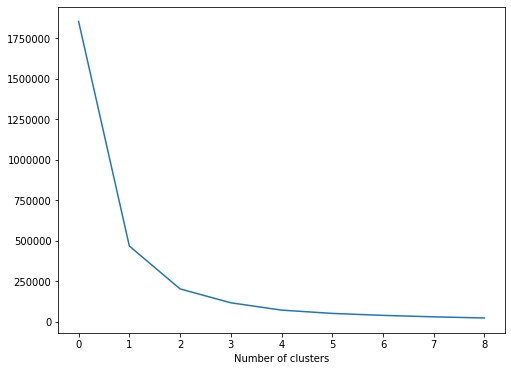

In [49]:
plt.figure(figsize=(8,6))
plt.plot(sum_squares)
plt.xlabel('Number of clusters')
plt.show()

**Math method**

In [51]:
#**Formula that calculates the distance between a point and a line**

\begin{equation*}

distande(P0,P1,(x,y)) = \frac{|(y1 - y0)x - (x1 - x0)y + x1y0 - y1x0|}{(y1 - y0)² + (x1 - xo)²}

\end{equation*}

SyntaxError: unexpected character after line continuation character (<ipython-input-51-98122d40aa57>, line 3)

In [53]:
# Math rule
## determine the ideal number of clusters by calculating the longest distance from the line
import math

def optimal_n_clusters(wcss):
    
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss) - 1]
    
    distance = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distance.append(numerator / denominator)
        
    return distance.index(max(distance)) + 2

In [54]:
n = optimal_n_clusters(sum_squares)
n

4

In [101]:
data_c.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Clustering RFM - creating index for each cluster

In [102]:
# copy dataset
data_c_clusters = data_c.copy()
data_c_clusters.shape

(2213, 27)

In [103]:
# create Recency_cluster column
kmeans = KMeans(n_clusters=4)

data_c_clusters['Recency_cluster'] = kmeans.fit_predict(df_recency)
data_c_clusters['Recency_cluster'].head()

0    1
1    2
2    2
3    2
4    3
Name: Recency_cluster, dtype: int32

In [104]:
data_c_clusters.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3


In [75]:
# group by mean
grouping_by_cluster = data_c_clusters.groupby('Recency_cluster')['Recency'].mean().reset_index()
grouping_by_cluster

,Recency_cluster,Recency
0,0,56.909091
1,1,9.575053
2,2,84.596573
3,3,31.914563


In [76]:
# order by cluster
grouping_by_cluster_ordered = grouping_by_cluster.sort_values(by='Recency', ascending=False).reset_index(drop=True)
grouping_by_cluster_ordered

,Recency_cluster,Recency
0,2,84.596573
1,0,56.909091
2,3,31.914563
3,1,9.575053


In [77]:
# create ordered cluster
grouping_by_cluster_ordered['index'] = grouping_by_cluster_ordered.index
grouping_by_cluster_ordered

,Recency_cluster,Recency,index
0,2,84.596573,0
1,0,56.909091,1
2,3,31.914563,2
3,1,9.575053,3


In [78]:
# add cluster colum to dataset
joining_clusters = pd.merge(data_c_clusters, grouping_by_cluster_ordered[['Recency_cluster', 'index']], on='Recency_cluster')
joining_clusters.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster,index
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1
1,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,0,1
2,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,0,1
3,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,0,0,1
4,9736,1980,Graduation,Married,41850.0,1,1,2012-12-24,51,53,5,19,2,13,4,3,3,0,3,8,0,0,0,0,0,0,0,0,1


In [79]:
# delete cluster unordered
remove_column = joining_clusters.drop('Recency_cluster', axis=1)
remove_column.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,index
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1
1,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,1
2,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,1
3,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,0,1
4,9736,1980,Graduation,Married,41850.0,1,1,2012-12-24,51,53,5,19,2,13,4,3,3,0,3,8,0,0,0,0,0,0,0,1


In [81]:
data_clusters = remove_column.rename(columns={'index':'Recency_cluster'})
data_clusters.head()

In [105]:
# function to clustering

def order_cluster(cluster_name, target_name, data):
    # group by mean
    grouping_by_cluster = data.groupby(cluster_name)[target_name].mean().reset_index()
    # order by cluster
    grouping_by_cluster_ordered = grouping_by_cluster.sort_values(by=target_name, ascending=False).reset_index(drop=True)
    # create ordered cluster
    grouping_by_cluster_ordered['index'] = grouping_by_cluster_ordered.index
    # add cluster colum to dataset
    joining_clusters = pd.merge(data, grouping_by_cluster_ordered[[cluster_name, 'index']], on=cluster_name)
    # delete cluster unordered
    remove_column = joining_clusters.drop(cluster_name, axis=1)
    # rename column
    data_clusters = remove_column.rename(columns={'index':cluster_name})
    return data_clusters

In [106]:
teste = order_cluster('Recency_cluster', 'Recency', data_c_clusters)

In [107]:
teste.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1
1,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,1
2,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,1
3,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,0,1
4,9736,1980,Graduation,Married,41850.0,1,1,2012-12-24,51,53,5,19,2,13,4,3,3,0,3,8,0,0,0,0,0,0,0,1


In [109]:
teste.groupby('Recency_cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_cluster,,,,,,,,
0,613.0,85.239804,8.038688,72.0,78.0,85.0,92.0,99.0
1,612.0,57.576797,7.787836,45.0,51.0,57.0,64.0,71.0
2,515.0,31.914563,6.667804,21.0,26.0,31.0,38.0,44.0
3,473.0,9.575053,6.135059,0.0,4.0,10.0,15.0,20.0


In [171]:
#data_c['Dt_Customer'] = pd.to_datetime(data_c['Dt_Customer'])

In [ ]:
# add to Visualizations
Year_Birth
Income
Dt_Customer
Recency

MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds

In [ ]:
# dados desbalanceados AcceptedCmp1-5, Complain, Response

In [ ]:
# tratar 'Dt_Customer' str -> date

In [ ]:
# https://datascience.stackexchange.com/questions/69519/how-to-tackle-too-many-outliers-in-dataset